拟合得到的最大功率 I0: 0.5817035320250615 mW
拟合得到的初始角度 theta0: -0.2580977145634606 度
拟合得到的功率偏置 C: -0.001508734718346509 mW
拟合优度 R^2: 0.98607483359111


<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
C:\Users\TaLEsCuber\AppData\Local\Temp\ipykernel_38600\1043371490.py:61: SyntaxWarning: invalid escape sequence '\c'
  f'$\\theta={theta0_fit:.2f}^\circ$\n'


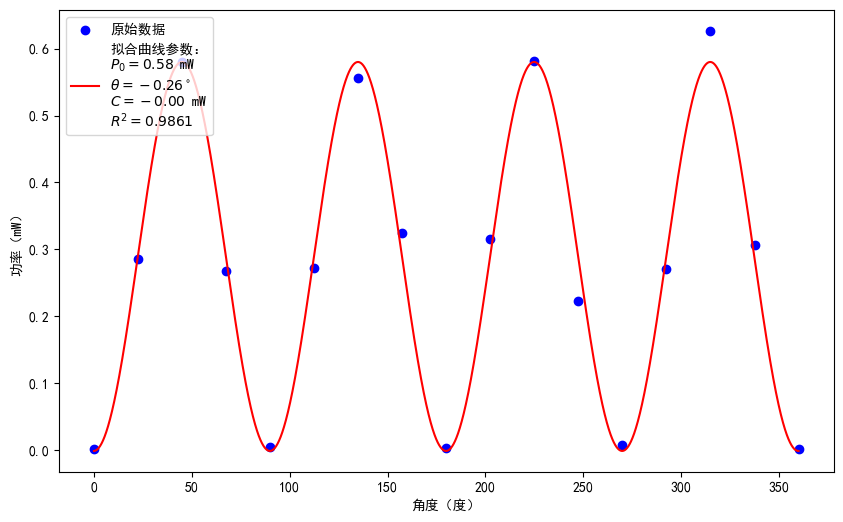

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Excel文件
file_path = 'draft1.xlsx'  # 请替换为你的Excel文件路径
df = pd.read_excel(file_path)

# 提取第8行到第24行的数据
df_subset = df.iloc[6:23]

# 提取角度列和透射功率
angles_str = df_subset.iloc[:, 1].astype(str)
angles = angles_str.str[9:].str.replace('°', '').astype(float)  # 保留角度值
powers = df_subset.iloc[:, 5].values  # 功率单位为毫瓦（mW）

# 定义马吕斯定律的拟合函数
def malus_law(x, I0, theta0, C):
    return I0 * np.sin(2*x*np.pi / 180 - theta0 * np.pi / 180)**2 + C

# 准备拟合的数据
xdata = angles
ydata = powers

# 初始猜测参数
initial_guess = [max(ydata), 0, min(ydata)]

# 拟合马吕斯定律
params, covariance = curve_fit(malus_law, xdata, ydata, p0=initial_guess)

# 提取拟合参数
I0_fit, theta0_fit, C_fit = params

# 使用拟合参数生成拟合曲线
fitted_x = np.linspace(0, 360, 10000)
fitted_y = malus_law(fitted_x, *params)

# 计算拟合优度 R^2
fitted_y_for_r2 = malus_law(xdata, *params)
r2 = r2_score(ydata, fitted_y_for_r2)

# 打印拟合参数
print(f"拟合得到的最大功率 I0: {I0_fit} mW")
print(f"拟合得到的初始角度 theta0: {theta0_fit} 度")
print(f"拟合得到的功率偏置 C: {C_fit} mW")
print(f"拟合优度 R^2: {r2}")

# 绘制原始数据和拟合曲线，并在图例中显示拟合参数和拟合优度
plt.figure(figsize=(10, 6))
plt.scatter(xdata, ydata, label='原始数据', color='blue')

# 将拟合参数和拟合优度格式化后显示在图例中
label_fit = (f'拟合曲线参数：\n'
             f'$P_0={I0_fit:.2f}$ mW\n'
             f'$\\theta={theta0_fit:.2f}^\circ$\n'
             f'$C={C_fit:.2f}$ mW\n'
             f'$R^2={r2:.4f}$')

plt.plot(fitted_x, fitted_y, label=label_fit, color='red')
plt.xlabel('角度（度）')
plt.ylabel('功率（mW）')
# plt.title('透射功率与理论计算拟合')

# 设置图例位置为左上角
plt.legend(loc='upper left')
plt.show()


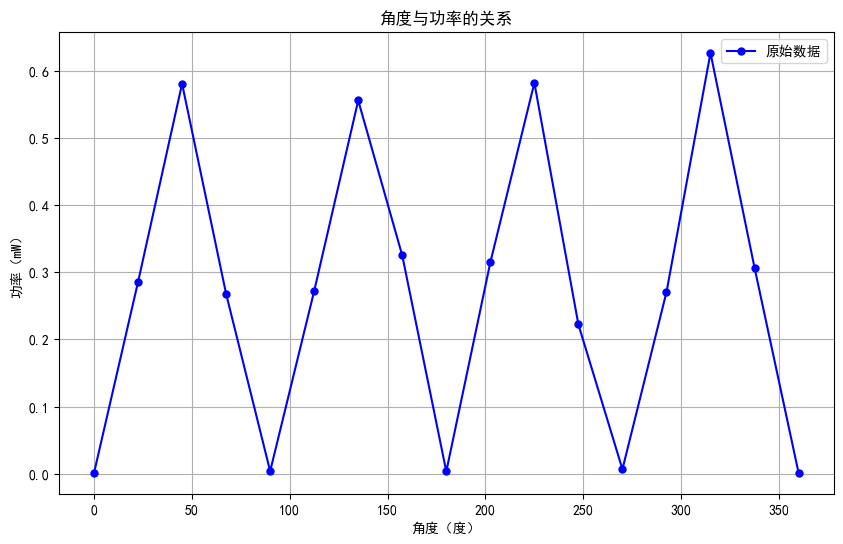

In [29]:
# 绘制角度和功率的折线图
plt.figure(figsize=(10, 6))
plt.plot(angles, powers, label='原始数据', color='blue', marker='o', linestyle='-', markersize=5)
plt.xlabel('角度（度）')
plt.ylabel('功率（mW）')
plt.title('角度与功率的关系')
plt.legend()
plt.grid(True)
plt.show()

拟合得到的振幅 A: 79.96278939957854 mW
拟合得到的周期 B: 0.00031027038758515204
拟合得到的相位偏移 C: -20065.826933528642 度
拟合得到的垂直偏移 D: -79.64370834815436 mW


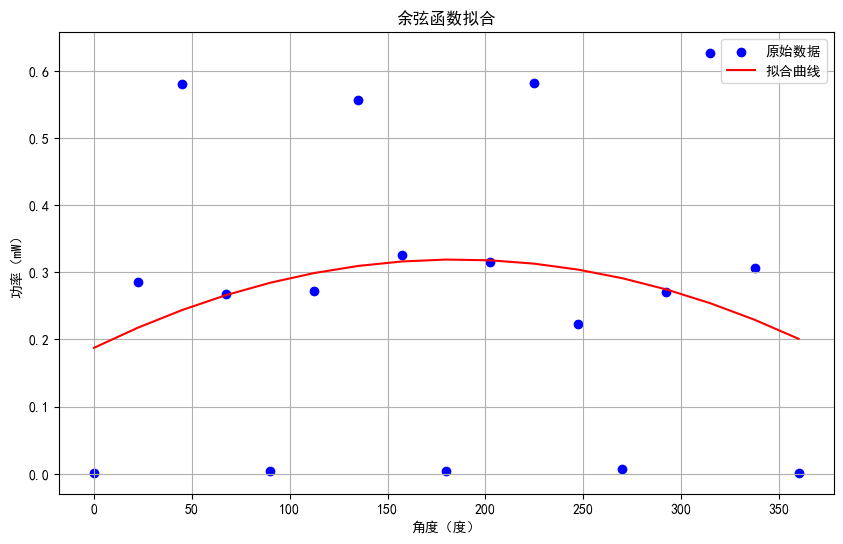

拟合优度 R^2: 0.03873233266992948


In [31]:
# 定义余弦函数拟合模型
def cos_fit(x, A, B, C, D):
    return A * np.cos(B * (x - C)) + D

# 准备拟合的数据
xdata = angles
ydata = powers

# 改进的初始猜测参数
initial_guess = [0.03616142454758518, np.pi/180, -73.45783017273646, 0.2550452149045763]

# 拟合余弦函数，增加最大函数调用次数
params, covariance = curve_fit(cos_fit, xdata, ydata, p0=initial_guess, maxfev=5000)

# 提取拟合参数
A_fit, B_fit, C_fit, D_fit = params

# 打印拟合参数
print(f"拟合得到的振幅 A: {A_fit} mW")
print(f"拟合得到的周期 B: {B_fit}")
print(f"拟合得到的相位偏移 C: {C_fit} 度")
print(f"拟合得到的垂直偏移 D: {D_fit} mW")

# 使用拟合参数生成拟合曲线
fitted_y = cos_fit(xdata, *params)

# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(xdata, ydata, label='原始数据', color='blue')
plt.plot(xdata, fitted_y, label='拟合曲线', color='red')
plt.xlabel('角度（度）')
plt.ylabel('功率（mW）')
plt.title('余弦函数拟合')
plt.legend()
plt.grid(True)
plt.show()

# 计算拟合优度
r2 = r2_score(ydata, fitted_y)
print(f"拟合优度 R^2: {r2}")